In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from keras.models import load_model
from PIL import Image

In [2]:
model = load_model('/kaggle/input/facenet-keras-1/facenet_keras.h5')

In [3]:
model.load_weights('/kaggle/input/facenet-keras-weights/facenet_keras_weights.h5')

In [4]:
image_path='/kaggle/input/input-images-and-csv/images'

In [5]:
id_pairs = pd.read_csv('/kaggle/input/input-images-and-csv/id-pair.csv')

In [6]:
def img2vec(image_dir, model):
    image = cv2.imread(image_dir)
    image = cv2.resize(image, (160, 160))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype('float32') / 255.0
    vec = model.predict(np.expand_dims(image, axis=0))[0]
    vec /= np.linalg.norm(vec)

    return vec


In [9]:
def imageFinder(image_id):
    
    person_id = id_pairs.loc[id_pairs['fid'] == image_id, 'pid'].values[0]
#     if person_id.empty:
#         print('No id:', image_id)
#         return
    
    input_img_path = '/kaggle/input/input-images-and-csv/images/images/' + image_id
    if not os.path.exists(input_img_path):
        print('Image not found:', input_img_path)
        return
    
    input_embedding = img2vec(input_img_path, model)
    
    distances = []
    for file in os.listdir('/kaggle/input/input-images-and-csv/images/images/'):
        if file.endswith('.jpg') and file != image_id+'.jpg':
            file_id = os.path.splitext(file)[0]
            embedding = img2vec('/kaggle/input/input-images-and-csv/images/images/'+file_id+'.jpg', model)
            distance = euclidean_distances([input_embedding], [embedding])[0][0]
            distances.append((file_id, distance))
    
    distances.sort(key=lambda x: x[1])
    nearest_images = distances[:6]
    print("nearest: ", nearest_images)
    
    plt.figure(figsize=(20,10))
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(input_img_path),cv2.COLOR_BGR2RGB))
    plt.title('Input Person ID: ' + str(person_id))
    for i in range(3, 8):
        plt.subplot(2, 3, i-1)
        plt.imshow(cv2.cvtColor(cv2.imread('/kaggle/input/input-images-and-csv/images/images/'+nearest_images[i-2][0]+'.jpg'),cv2.COLOR_BGR2RGB))
        #plt.title('Person ID: ' + str(id_pairs.loc[id_pairs['fid'] == nearest_images[i-2][0], 'fid'].iloc[0]))
        print_person_id=id_pairs.loc[id_pairs['fid'] == nearest_images[i-2][0]+'.jpg', 'pid'].values[0]
        print('Print: ', print_person_id)
        str_ordial=str(ordinal(i-2))
        plt.title(str_ordial+' Person ID: ' + str(print_person_id))
    plt.show()

def ordinal(n):
    if 10 <= n % 100 < 20:
        suffix = "th"
    else:
        suffix = {1: "st", 2: "nd", 3: "rd"}.get(n % 10, "th")
    return f"{n}{suffix}"

1/1 [==============================] - 0s 79ms/step
nearest:  [('001493', 0.0), ('099652', 0.48218083), ('097237', 0.60626256), ('002711', 0.6154623), ('017148', 0.66860706), ('177808', 0.6693949)]
Print:  417
Print:  417
Print:  417
Print:  417
Print:  1590


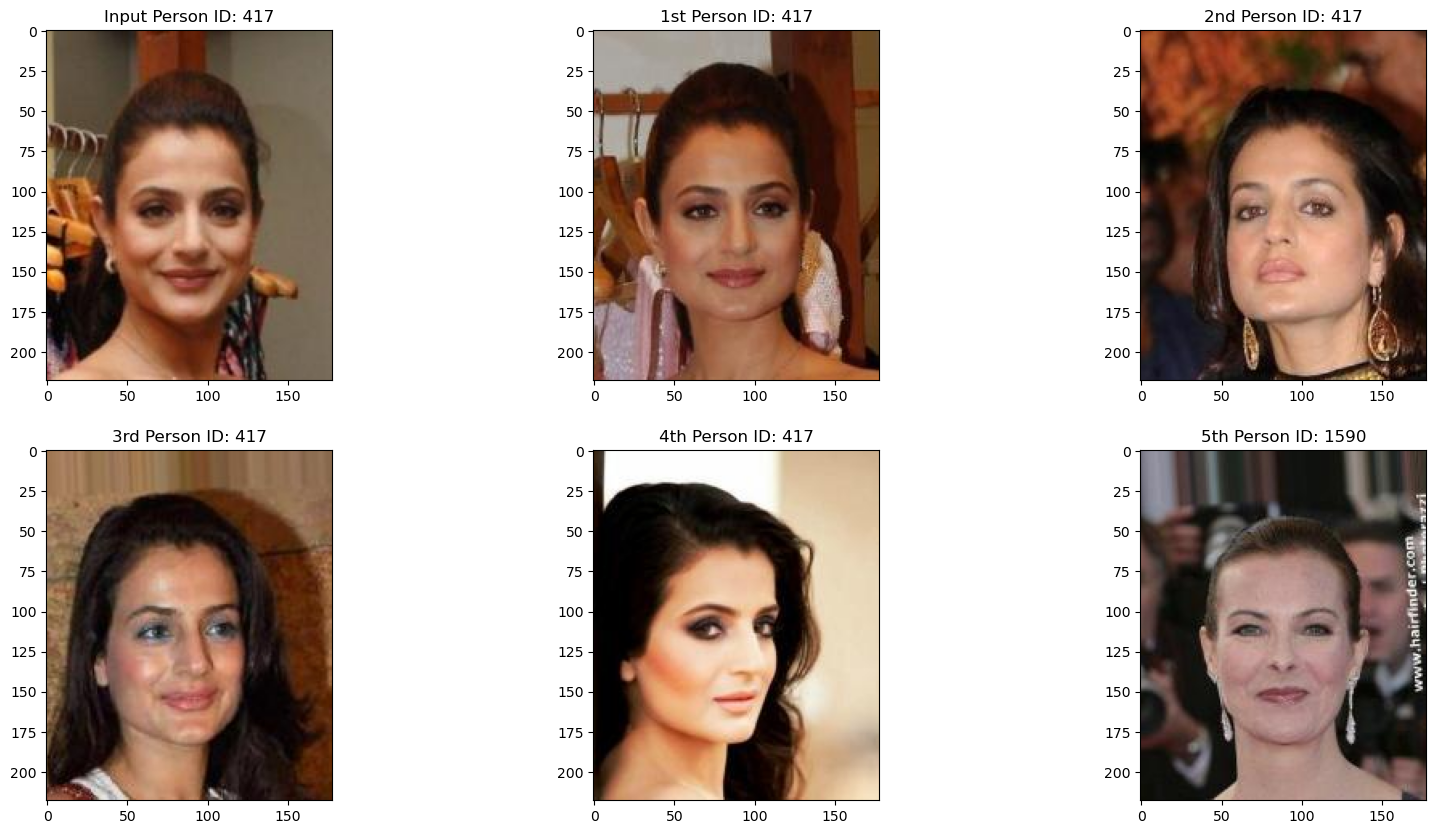

In [12]:
imageFinder('001493.jpg')